Credit Card Approval Predictor
Banks receive a lot of applications for issuance of credit cards. Many of them rejected for many reasons, like high-loan balances, low-income levels, or too many inquiries on an individual’s credit report. Manually analyzing these applications is error-prone and a time-consuming process. This task can be automated with the power of machine learning, In this project, we will be build an automatic credit card approval predictor using machine learning techniques, just like the real banks do. 

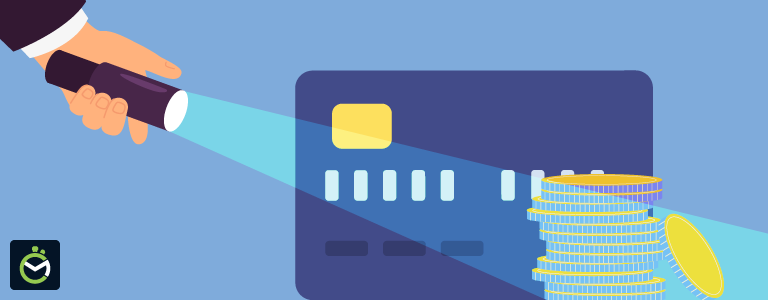

1. ID: Unique Id of the row</br>
2. CODE_GENDER: Gender of the applicant. M is male and F is female.</br>
3. FLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.</br>
4. FLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.</br>
5. CNT_CHILDREN: Count of children.</br>
6. AMT_INCOME_TOTAL: the amount of the income.</br>
7. NAME_INCOME_TYPE: The type of income (5 types in total).</br>
8. NAME_EDUCATION_TYPE: The type of education (5 types in total).</br>
9. NAME_FAMILY_STATUS: The type of family status (6 types in total).</br>
10. DAYS_BIRTH: The number of the days from birth (Negative values).</br>
11. DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.</br>
12. FLAG_MOBIL: Is an applicant with a mobile. 1 is True and 0 is False.</br>
13. FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.</br>
14. FLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.</br>
15. FLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.</br>
16. OCCUPATION_TYPE: The type of occupation (19 types in total). This column has missing values.</br>
17. CNT_FAM_MEMBERS: The count of family members.</br>
This is a csv file with credit record for a part of ID in application record. We can treat it a file to generate labels for modeling. For the applicants who have a record more than 59 past due, they should be rejected.</br>

After reading the data, we have the following columns.</br>

1. ID: Unique Id of the row in application record.
2. MONTHS_BALANCE: The number of months from record time.
3. STATUS: Credit status for this month.
    X: No loan for the month
    C: paid off that month
    0: 1-29 days past due
    1: 30-59 days past due
    2: 60-89 days overdue
    3: 90-119 days overdue
    4: 120-149 days overdue
    5: Overdue or bad debts, write-offs for more than 150 days

    
In this project, we’ll be using Credit Card Approval Dataset. The structure of our project will be as follows:

1. To get a basic introduction of our project & What’s the business problem associated with it ?
2. We’ll start by loading and viewing the dataset.
3. To manipulate data, if there are any missing entries in the dataset.
4. To perform exploratory data analysis (EDA) on our dataset.
5. To pre-process data before applying machine learning model to the dataset.
6. To apply machine learning models that can predict if an individual’s application for a credit card will be accepted or not.

16/02/2024

In [170]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly import tools
import plotly.offline as pyo
import seaborn as sns

import missingno as msno

In [171]:
data = pd.read_csv(r'application_record.csv')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [172]:
records = pd.read_csv(r'credit_record.csv')
records.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [173]:
data.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [174]:
data.shape

(438557, 18)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [176]:
print("Number of datapoints for application records: {}".format(len(data)))
print("Number of unique clients in datasets: {}".format(len(data.ID.unique())))

Number of datapoints for application records: 438557
Number of unique clients in datasets: 438510


The number of application records & the unique ID's are not same which depicts the values must be duplicated

In [177]:
records

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [178]:
print("Number of datapoints for credit records: {}".format(len(records)))
print("Number of unique clients in datasets: {}".format(len(records.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in datasets: 45985


The number of application records & the unique ID's are not same which depicts the values must be duplicated

Before removing Duplicate value

In [179]:
len(set(records['ID']).intersection(set(data['ID'])))

36457

The number of unique ids in the two datasets is not equal. There are fewer customers than the applications in the credit record dataset. The intersection is 36,457 customers

After removing duplicated data

In [180]:
print(f'Duplicates in applications data: {data.iloc[:,1:].duplicated().sum()}, ({np.round(100*data.iloc[:,1:].duplicated().sum()/len(data),1)}%)')
print('')
print(f'Duplicates in records data: {records.duplicated().sum()},({np.round(100*records.duplicated().sum()/len(records),1)}%)')

Duplicates in applications data: 348472, (79.5%)

Duplicates in records data: 0,(0.0%)


In [181]:
data.duplicated().sum()

0

With ID column duplicate value is 0

Drop Duplicated value

In [182]:
data = data.drop_duplicates(subset=data.columns[1:], keep='first')

In [183]:
data.shape

(90085, 18)

In [184]:
len(set(records['ID']).intersection(set(data['ID'])))

9709

After deleting the duplicate value the column value in both the column is 9709

Find the cardinality in the data

Cardinality refers to the distinctiveness or uniqueness of the values in a datset or database column. It represents the number of unique values in a column or a set of columns.

In [185]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                columns=['Column_Name','Num_Unique']).sort_values(by=['Num_Unique'])

In [186]:
unique_counts

,Column_Name,Num_Unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [187]:
[(col, data[col].nunique()) for col in data.columns]

[('ID', 90085),
 ('CODE_GENDER', 2),
 ('FLAG_OWN_CAR', 2),
 ('FLAG_OWN_REALTY', 2),
 ('CNT_CHILDREN', 12),
 ('AMT_INCOME_TOTAL', 866),
 ('NAME_INCOME_TYPE', 5),
 ('NAME_EDUCATION_TYPE', 5),
 ('NAME_FAMILY_STATUS', 5),
 ('NAME_HOUSING_TYPE', 6),
 ('DAYS_BIRTH', 16379),
 ('DAYS_EMPLOYED', 9406),
 ('FLAG_MOBIL', 1),
 ('FLAG_WORK_PHONE', 2),
 ('FLAG_PHONE', 2),
 ('FLAG_EMAIL', 2),
 ('OCCUPATION_TYPE', 18),
 ('CNT_FAM_MEMBERS', 13)]

In [188]:
unique_counts = pd.DataFrame.from_records([(col, records[col].nunique()) for col in records.columns],
                                columns=['Column_Name','Num_Unique']).sort_values(by=['Num_Unique'])

In [189]:
unique_counts

,Column_Name,Num_Unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [190]:
data['FLAG_MOBIL'].unique()

array([1], dtype=int64)

From the above observations it was observed that "FLAG_MOBIL" is having only one value in the entire column which indicates that there is a singularity in the data in that particular column. So this vlaues are going to be the same no matter whichever customer is taken into considertion. We can try to eliminate this variable as the values are not changing so contribution of this variable is quite negligible.

In [191]:
data.drop(['FLAG_MOBIL'],axis=1,inplace=True)

In [192]:
data.shape

(90085, 17)

In [193]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2


Handling the missing value

Missing values can pose challenges when working with data as they can affect data integrity accuracy and validaty of analysis or modeling results. It is important to handle missing values appropriately in order to avoid baised or incomplete analysis

In [194]:
round((data.isnull().sum()/len(data)*100),3)

ID                      0.000
CODE_GENDER             0.000
FLAG_OWN_CAR            0.000
FLAG_OWN_REALTY         0.000
CNT_CHILDREN            0.000
AMT_INCOME_TOTAL        0.000
NAME_INCOME_TYPE        0.000
NAME_EDUCATION_TYPE     0.000
NAME_FAMILY_STATUS      0.000
NAME_HOUSING_TYPE       0.000
DAYS_BIRTH              0.000
DAYS_EMPLOYED           0.000
FLAG_WORK_PHONE         0.000
FLAG_PHONE              0.000
FLAG_EMAIL              0.000
OCCUPATION_TYPE        30.501
CNT_FAM_MEMBERS         0.000
dtype: float64

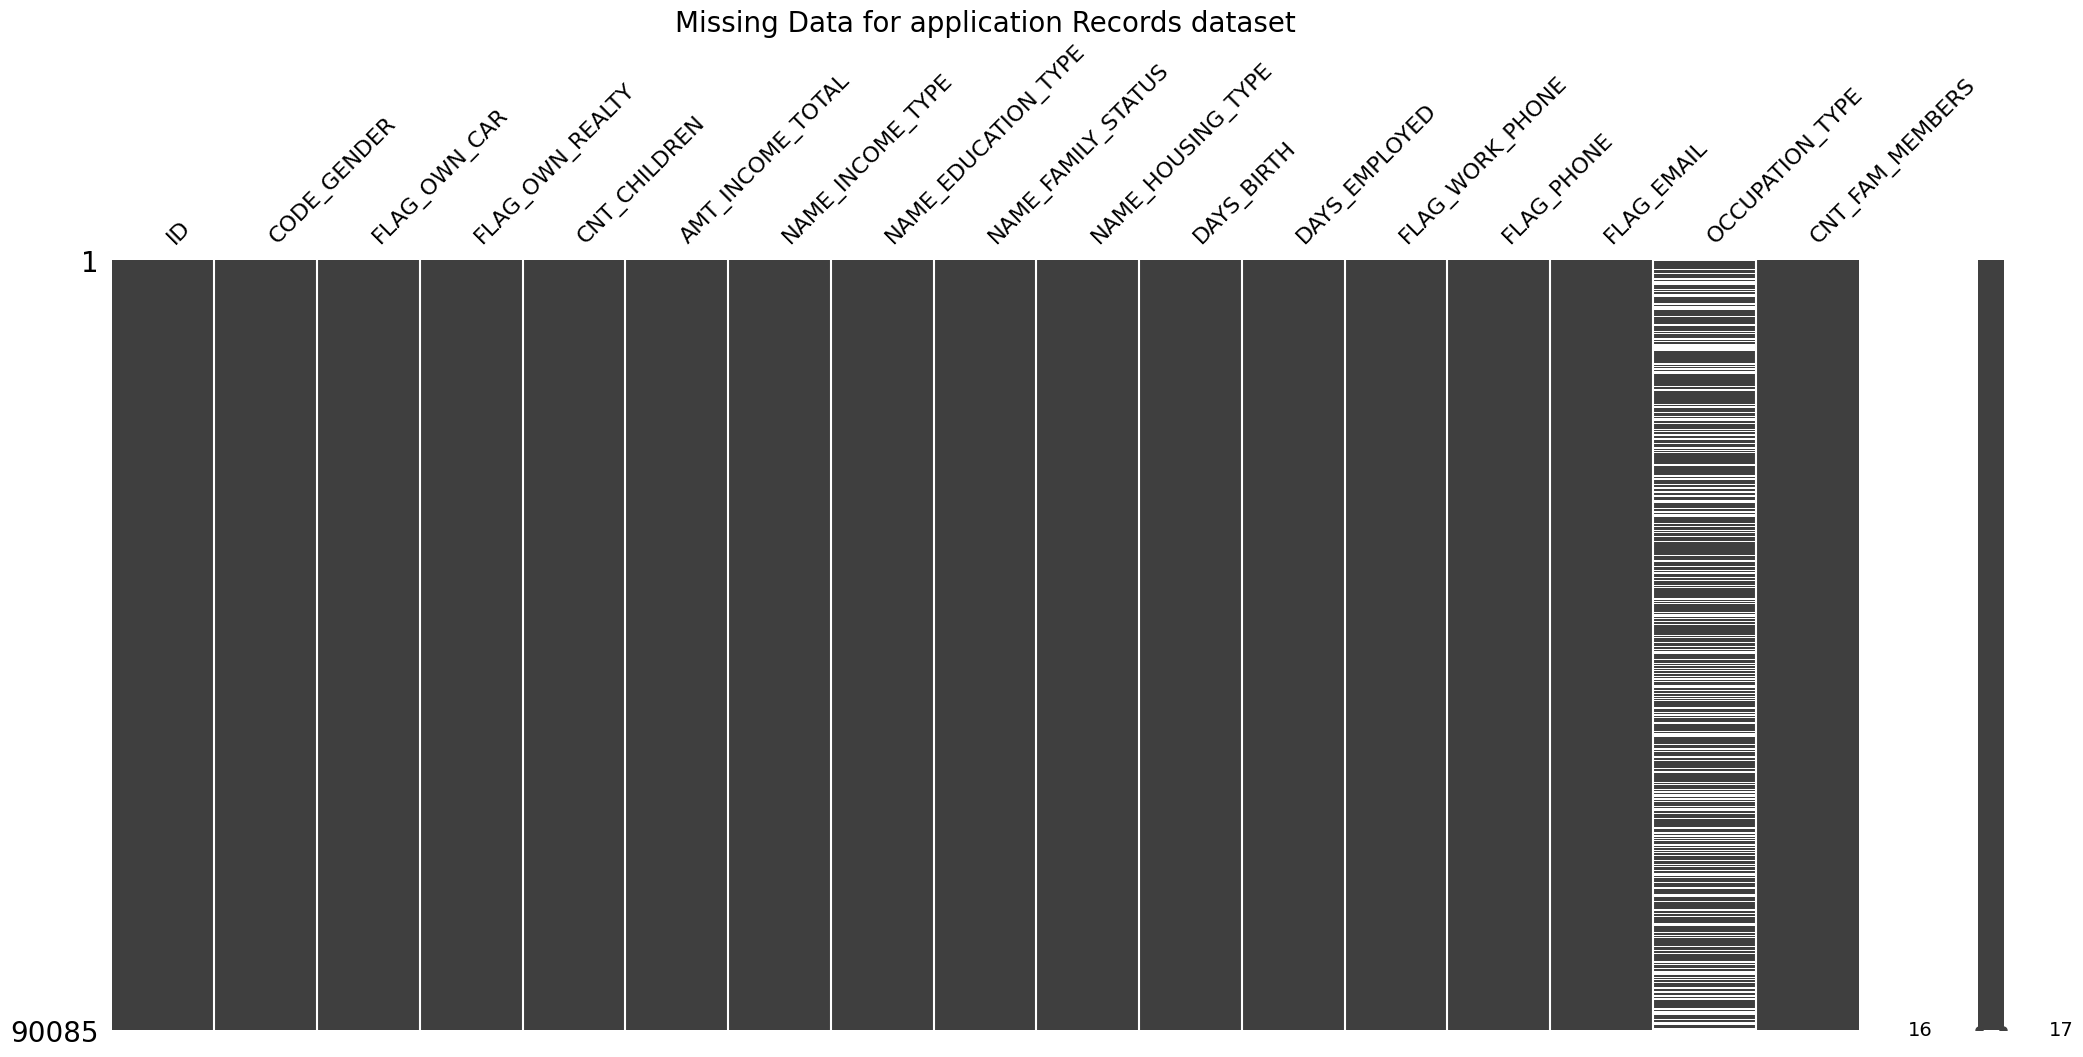

In [195]:
missing = msno.matrix(data)
missing.set_title("Missing Data for application Records dataset",fontsize=20);

As we can observe from above that the "occupation type" is the only column from applications data having large set of missing values. Appropiate handing of missing values can help ensure the integrity and accuracy of the data analysis and modeling results.

In [196]:
records.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

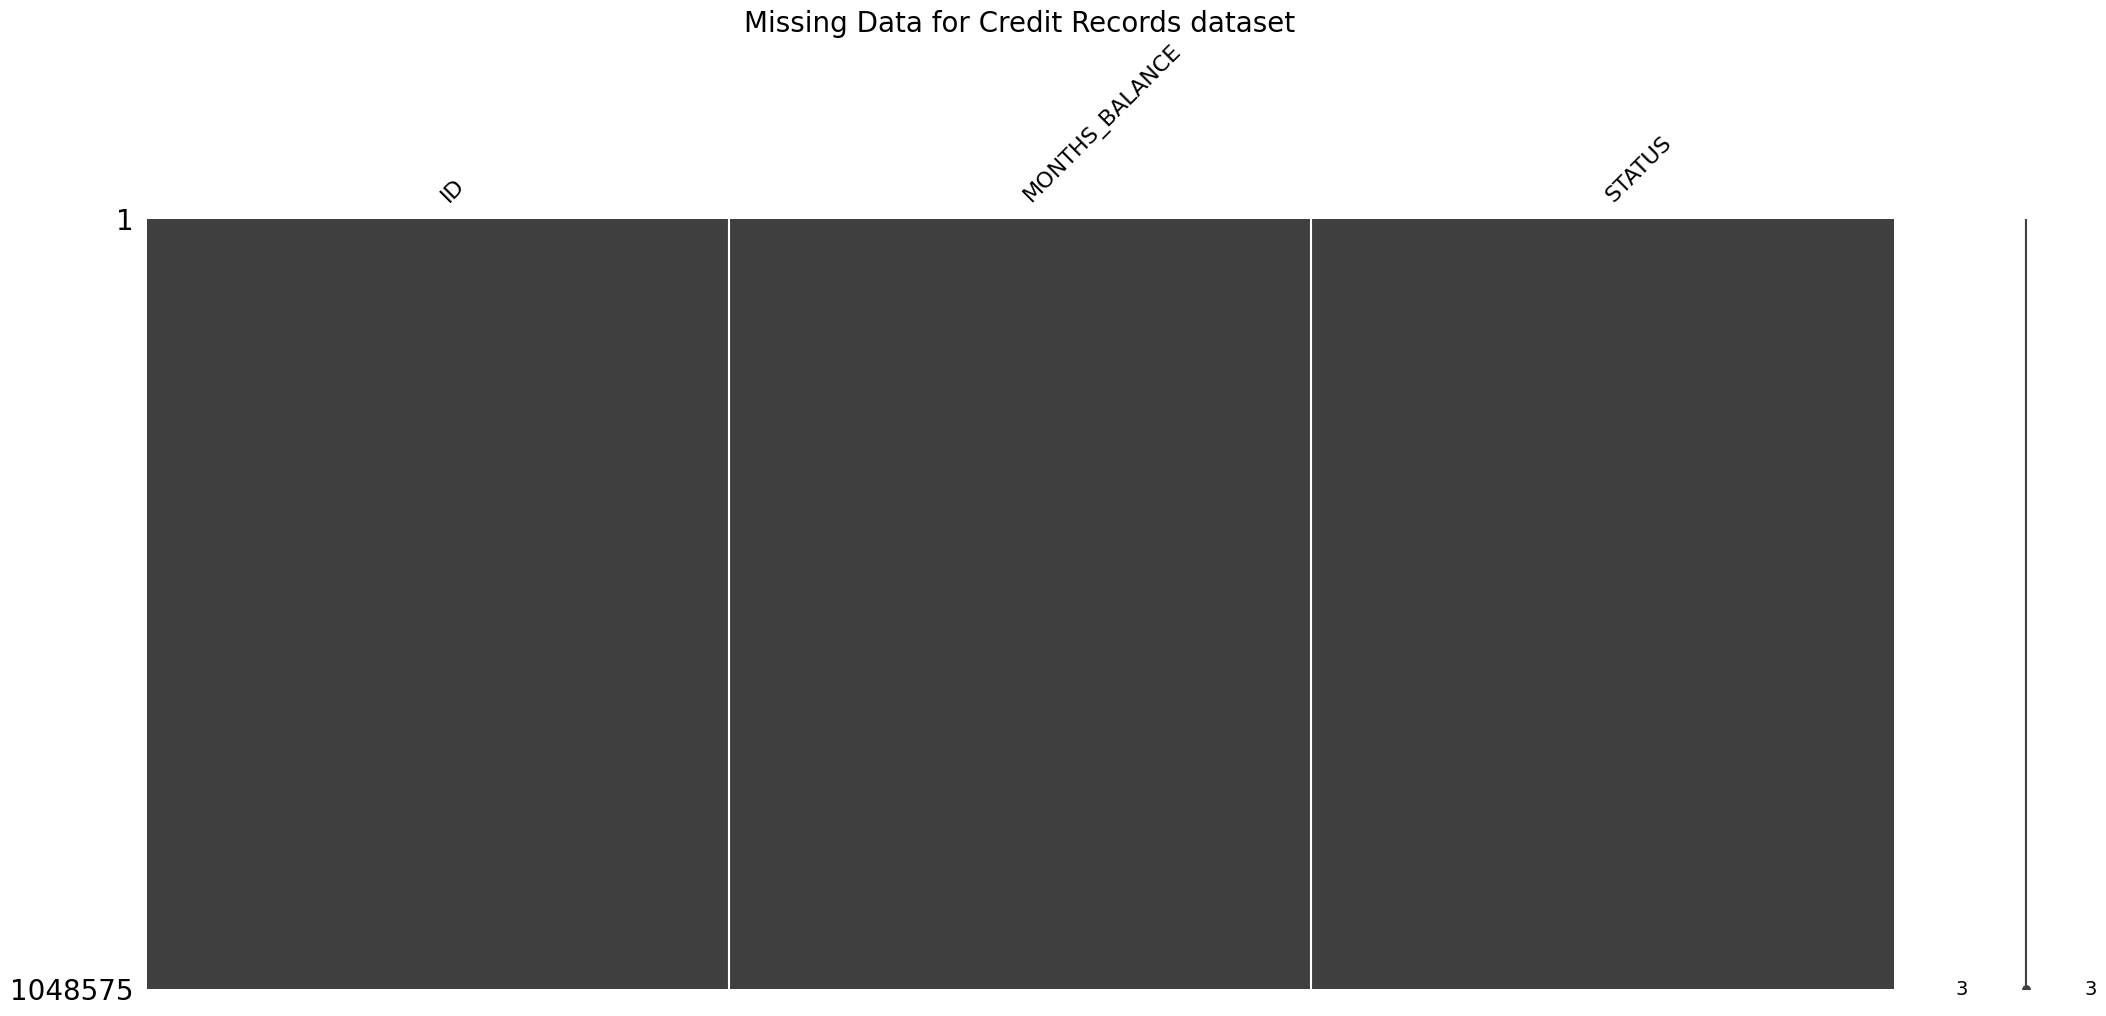

In [197]:
missing = msno.matrix(records)
missing.set_title("Missing Data for Credit Records dataset",fontsize=20);

In [198]:
round((data['OCCUPATION_TYPE'].value_counts()/len(data)*100),2)

OCCUPATION_TYPE
Laborers                 18.45
Sales staff              10.13
Core staff                8.98
Managers                  7.41
Drivers                   6.50
High skill tech staff     3.73
Accountants               3.37
Medicine staff            2.76
Cooking staff             1.96
Security staff            1.93
Cleaning staff            1.36
Private service staff     0.83
Low-skill Laborers        0.63
Secretaries               0.46
Waiters/barmen staff      0.44
Realty agents             0.24
HR staff                  0.19
IT staff                  0.14
Name: count, dtype: float64

In [199]:
#Filling missing records
data['OCCUPATION_TYPE'].fillna(value="Other",inplace=True)

As droping the missing values completely can lead to huge data loss. So instead of dropping we will try to fill the misssing values as "Other" so the data loss can also be prevented & missing values will also get handled appropriately.

In [200]:
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [201]:
records.STATUS.value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

22/02/2024

Converting data in proper format

In [202]:
#Target-1 (high risk) if there is at least
#one month where user is late on payments by 30 days or more

records['target']=records['STATUS']
records['target'].replace('X',0, inplace=True)
records['target'].replace('C',0, inplace=True)
records['target']=records['target'].astype(int)
records.loc[records['target']>1, 'target']=1
records.head()

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0


In [203]:
records.target.value_counts()

target
0    1034381
1      14194
Name: count, dtype: int64

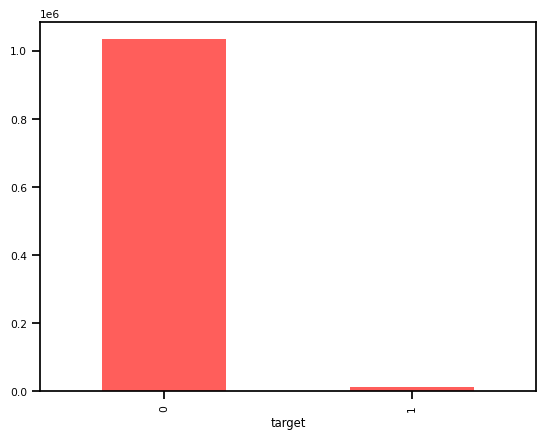

In [204]:
records.target.value_counts().plot(kind='bar');

In [205]:
print("Number of datapoints for credit records: {}".format(len(records)))
print("Number of unique clients in dataset: {}".format(len(records.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


In [206]:
df = pd.DataFrame(records.groupby(["ID"])['target'].agg(max)).reset_index()

In [207]:
df.head()

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [208]:
df

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [209]:
new_df = pd.merge(data, df, how="inner", on=['ID'])

In [210]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,0,0,0,Laborers,2,1
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,0,Other,2,1
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,0,0,0,Other,2,1
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2,1


In [211]:
#Extracting how many months account has been open for
start_df = pd.DataFrame(records.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

#Rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

#Make entries positive
start_df['ACCOUNT_LENGTH']= -start_df['ACCOUNT_LENGTH']

In [212]:
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [213]:
#Merge dataframe on ID
new_df = pd.merge(new_df, start_df, how='inner',on=['ID'])

In [214]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2,1,15
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,0,29
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,0,4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1,0,20
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,0,0,0,Laborers,2,1,20
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,0,Other,2,1,19
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,0,0,0,Other,2,1,21
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2,1,32


In [215]:
data['DAYS_BIRTH']

0        -12005
2        -21474
3        -19110
7        -22464
10       -16872
          ...  
438541   -13510
438545   -18832
438547   -10966
438552   -22717
438553   -15939
Name: DAYS_BIRTH, Length: 90085, dtype: int64

As you can see that 'DAYS_BIRTH' column is given the information about the age of individual, but here it's not in a proper format. So we will try to convert it into a proper form to make it more understandable

In [216]:
#Create age feature
new_df['AGE_YEARS']= round(-new_df['DAYS_BIRTH']/365.2425,0)
#The number 365.2425 is used because it represents the average length of a tropical year, which is the
# time it takes for the earth to complete one orbit around the Sun.

In [217]:
new_df['AGE_YEARS'].head()

0    33.0
1    59.0
2    52.0
3    62.0
4    46.0
Name: AGE_YEARS, dtype: float64

As now we have converted the "DAYS_BIRTH" cloumn into a proper format & named it as "AGE_YEARS". So now both are somewhat sharing same set of information in the data. So we will drop out the "DAYS_BIRTH" for betterment of te data.

In [218]:
new_df.drop(['DAYS_BIRTH'],axis=1,inplace=True)

In [219]:
#Create unemployed indicator
new_df['UNEMPLOYED']=0
new_df.loc[-new_df['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1

In [220]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2,1,15,33.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2,0,29,59.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1,0,4,52.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1,0,20,62.0,1
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2,0,5,46.0,0


As we can observe the no. of the days the applicant is working i.e. 'DAYS_EMPLOYED' is not in proper format. So we will try to convert it in a proper format.

In [221]:
#Create years employed feature
new_df['YEARS_EMPLOYED'] = round(-new_df['DAYS_EMPLOYED']/365.2425)
new_df.loc[new_df['YEARS_EMPLOYED']<0, 'YEARS_EMPLOYED']=0
new_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,Other,1,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,Accountants,2,0,5,46.0,0,2.0
5,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,2,0,17,49.0,0,3.0
6,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,...,0,0,0,Accountants,2,1,25,29.0,0,3.0
7,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,1,0,Laborers,2,1,31,27.0,0,4.0
8,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,Other,2,0,44,30.0,0,4.0
9,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,5,0,24,35.0,0,3.0


As now we have converted the 'DAYS_EMPLOYED' column into a proper format & named it as 'YEARS_Employed'. So now both are somewhat sharing same set of information in the data. So we will drop out the'DAYS_EMPLOYED' for betterment of the data.

In [222]:
new_df.drop('DAYS_EMPLOYED', axis=1,inplace=True)

In [223]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2,0,5,46.0,0,2.0


Renaming the column names

In [224]:
new_df = new_df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car',
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [225]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2,0,5,46.0,0,2.0


In [226]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed'],
      dtype='object')

In [227]:
new_df.dtypes

ID                   int64
Gender              object
Own_car             object
Own_property        object
Num_children         int64
Total_income       float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Work_phone           int64
Phone                int64
Email                int64
Occupation_type     object
Num_family           int64
Target               int32
Account_length       int64
Age                float64
Unemployed           int64
Years_employed     float64
dtype: object

In [228]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,
    "figure.autolayout":True})

palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']

sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 1000x1000 with 0 Axes>

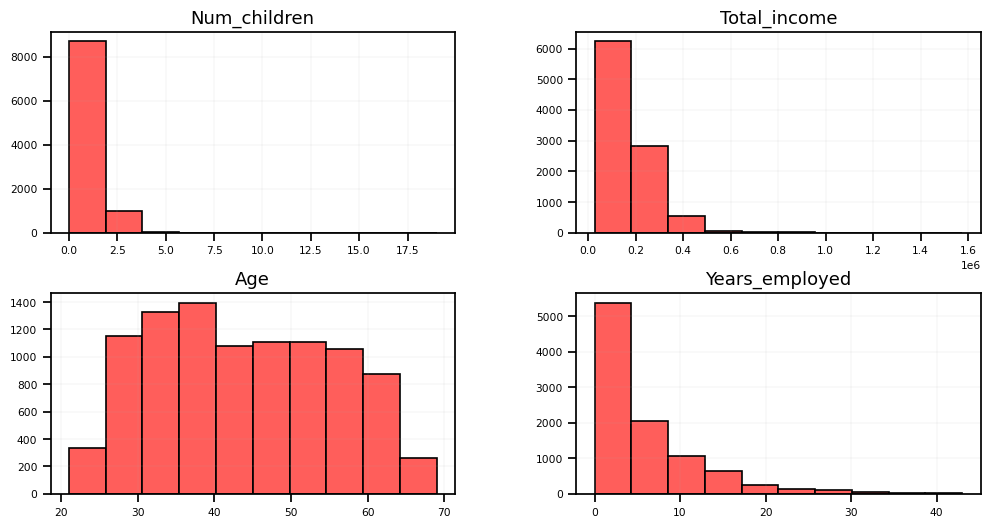

In [229]:
plt.figure(figsize=(10,10))

cols_to_plot = ['Num_children','Total_income','Age','Years_employed']
new_df[cols_to_plot].hist(edgecolor = 'black',linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)

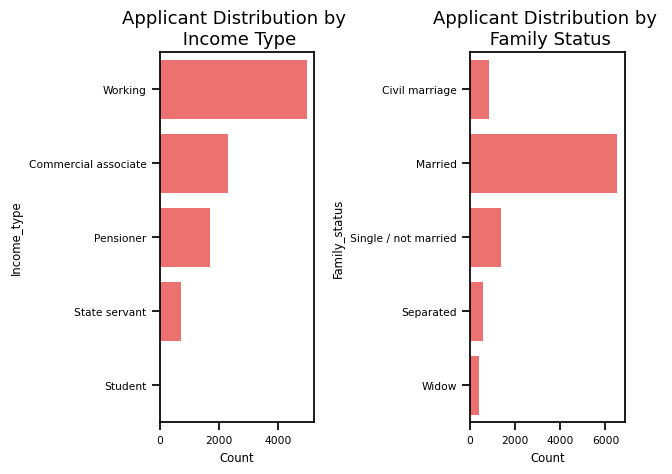

In [230]:
ig, axes = plt.subplots(1,2)

g1=sns.countplot(y=new_df.Income_type,linewidth=1.2, ax=axes[0])
g1.set_title("Applicant Distribution by \n Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=new_df.Family_status,linewidth=1.2, ax=axes[1])
g2.set_title("Applicant Distribution by \n Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

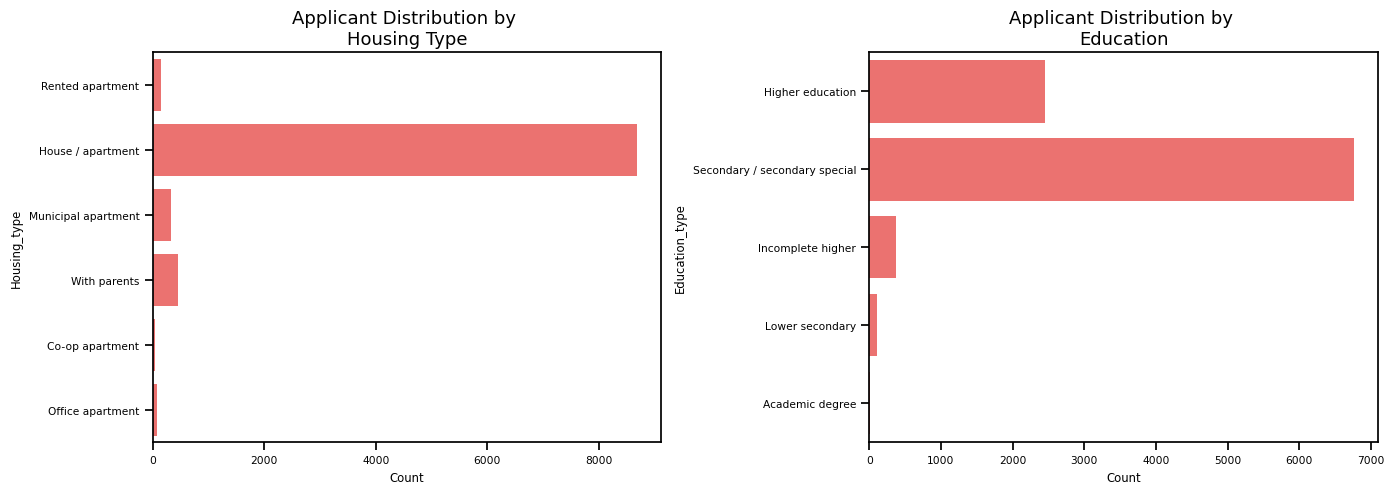

In [231]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=new_df.Housing_type,linewidth=1.2, ax=axes[0])
g1.set_title("Applicant Distribution by \nHousing Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=new_df.Education_type,linewidth=1.2, ax=axes[1])
g2.set_title("Applicant Distribution by \nEducation")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

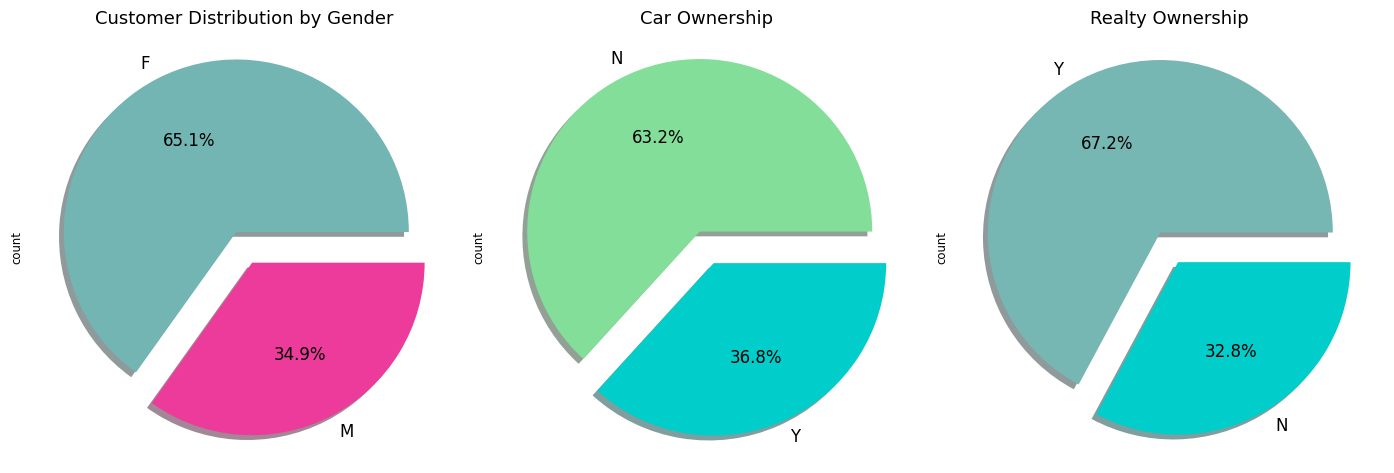

In [232]:
fig, axes = plt.subplots(1,3)

g1= new_df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#73B5B3","#EC3B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= new_df['Own_car'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#82DE99","#01CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= new_df['Own_property'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B6B3","#01CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

In [233]:
object_columns = new_df.columns[new_df.dtypes =='object'].tolist()
#object columns in dataset

unique_counts = pd.DataFrame.from_records([(col, new_df[object_columns][col].nunique()) for col in new_df[object_columns].columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

unique_counts
#unique counts for object columns

,Column_Name,Num_Unique
0,Gender,2
1,Own_car,2
2,Own_property,2
3,Income_type,5
4,Education_type,5
5,Family_status,5
6,Housing_type,6
7,Occupation_type,19


In [234]:
#Checking unique values from categorical columns

for i in new_df.columns[(new_df.dtypes=='object').values].tolist():
    print(i,'\n')
    print(new_df[i].value_counts())
    print('-------------------------------------------------')

Gender 

Gender
F    6323
M    3386
Name: count, dtype: int64
-------------------------------------------------
Own_car 

Own_car
N    6139
Y    3570
Name: count, dtype: int64
-------------------------------------------------
Own_property 

Own_property
Y    6520
N    3189
Name: count, dtype: int64
-------------------------------------------------
Income_type 

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64
-------------------------------------------------
Education_type 

Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64
-------------------------------------------------
Family_status 

Family_status
Married                 6530
Single / not married    1359
Civil marriage   

Converting into number 

In [235]:
#Encode binary feature
new_df['Gender'] = new_df['Gender'].replace(['F','M'],[0,1])
new_df['Own_car'] = new_df['Own_car'].replace(['Y','N'],[1,0])
new_df['Own_property'] = new_df['Own_property'].replace(['Y','N'],[1,0])

In [236]:
new_df

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2,1,15,33.0,0,12.0
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,0,29,59.0,0,3.0
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,0,4,52.0,0,8.0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1,0,20,62.0,1,0.0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2,0,5,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0,0,0,Laborers,2,1,20,56.0,0,1.0
9705,5149055,0,0,1,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,Other,2,1,19,43.0,0,7.0
9706,5149729,1,1,1,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Other,2,1,21,52.0,0,5.0
9707,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2,1,32,34.0,0,4.0


23/02/2024

In [237]:
new_df.Family_status.unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [238]:
new_df['IS_WORKING'] = new_df['Income_type'].replace(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'],[1,1,1,0,0])

new_df['Marital_status'] = new_df['Family_status'].replace(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'],[1,1,0,0,0])

In [239]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,IS_WORKING,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,Other,2,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,Other,1,0,20,62.0,1,0.0,1,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2,0,5,46.0,0,2.0,1,1


In [240]:
housing_type = {'House / apartment' : 'House / apartment',
                'With parents' : 'With parents',
                'Municipal apartment' : 'House / apartment',
                'Rented apartment': 'House / apartment',
                'Office apartment' : 'House / apartment',
                'Co-op apartment' : 'House / apartment'}

In [241]:
new_df['Housing_type'] = new_df['Housing_type'].map(housing_type)

In [242]:
new_df['Housing_type'].value_counts()

Housing_type
House / apartment    9261
With parents          448
Name: count, dtype: int64

In [243]:
family_status = {'Single / not married' : 'Single',
                 'Separated': 'Single',
                 'Widow':'Single',
                 'Civil marriage':'Married',
                 'Married':'Married'}
new_df['Family_status'] = new_df['Family_status'].map(family_status)

In [244]:
new_df.Family_status.value_counts()

Family_status
Married    7366
Single     2343
Name: count, dtype: int64

In [245]:
education_type = {'Secondary / secondary special':'Secondary',
                     'Lower secondary':'Secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}

new_df['Education_type'] = new_df['Education_type'].map(education_type)

In [246]:
new_df.Education_type.value_counts()

Education_type
Secondary           6875
Higher education    2828
Academic degree        6
Name: count, dtype: int64

In [247]:
income_type = {'Commercial associate':'Working',
               'State servant':'Working',
               'Working':'Working',
               'Pensioner' : 'Pensioner',
               'Student':'Student'}

new_df['Income_type'] = new_df['Income_type'].map(income_type)

In [248]:
new_df['Income_type'].value_counts()

Income_type
Working      7994
Pensioner    1712
Student         3
Name: count, dtype: int64

In [249]:
new_df['Household_Size'] = new_df['Num_children']+new_df['Marital_status'].apply(lambda x:2 if x==1 else 1)

In [250]:
new_df

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,IS_WORKING,Marital_status,Household_Size
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,Other,2,1,15,33.0,0,12.0,1,1,2
1,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House / apartment,...,Security staff,2,0,29,59.0,0,3.0,1,1,2
2,5008808,0,0,1,0,270000.0,Working,Secondary,Single,House / apartment,...,Sales staff,1,0,4,52.0,0,8.0,1,0,1
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,Other,1,0,20,62.0,1,0.0,1,0,1
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,Accountants,2,0,5,46.0,0,2.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,Pensioner,Secondary,Married,House / apartment,...,Laborers,2,1,20,56.0,0,1.0,1,1,2
9705,5149055,0,0,1,0,112500.0,Working,Secondary,Married,House / apartment,...,Other,2,1,19,43.0,0,7.0,1,1,2
9706,5149729,1,1,1,0,90000.0,Working,Secondary,Married,House / apartment,...,Other,2,1,21,52.0,0,5.0,1,1,2
9707,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,Medicine staff,2,1,32,34.0,0,4.0,1,1,2


In [251]:
# pip install nbformat>=4.2.0

In [252]:
numerical_cols = ["Total_income","Age","Years_employed","Household_Size"]

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Income", "Age", "Experience", "Family Members Count"))

fig.add_trace(go.Box(x=new_df.Total_income, name='Income',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=new_df.Age, name='Age', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=new_df.Years_employed, name='Experience', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=new_df.Household_Size, name="Family Member Count", boxmean=True),row=2, col=2)

fig.show()

In [253]:
new_df['Years_employed'].value_counts()

Years_employed
0.0     1978
1.0      991
2.0      851
3.0      824
4.0      735
5.0      645
6.0      510
7.0      463
8.0      418
9.0      354
10.0     306
11.0     228
12.0     185
15.0     178
13.0     164
14.0     140
16.0      87
17.0      76
19.0      69
18.0      68
21.0      57
20.0      57
22.0      45
23.0      38
24.0      38
25.0      28
26.0      28
28.0      23
27.0      20
29.0      19
30.0      14
31.0      11
33.0      11
32.0      11
34.0       9
35.0       6
38.0       4
41.0       4
36.0       4
37.0       3
39.0       3
40.0       3
43.0       2
42.0       1
Name: count, dtype: int64

In [254]:
new_df['Household_Size'].value_counts()

Household_Size
2     5173
1     1957
3     1636
4      801
5      117
6       18
7        4
15       1
20       1
9        1
Name: count, dtype: int64

In [255]:
new_df[(new_df['Household_Size']==20)]

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,IS_WORKING,Marital_status,Household_Size
6840,5105054,0,0,1,19,112500.0,Working,Secondary,Single,House / apartment,...,Waiters/barmen staff,20,0,5,30.0,0,5.0,1,0,20


<Axes: ylabel='Num_children'>

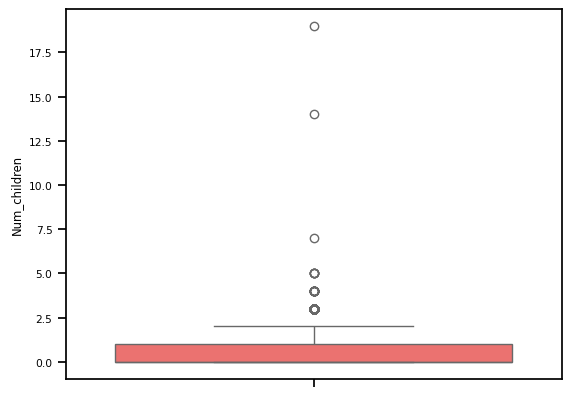

In [256]:
sns.boxplot(new_df['Num_children'])

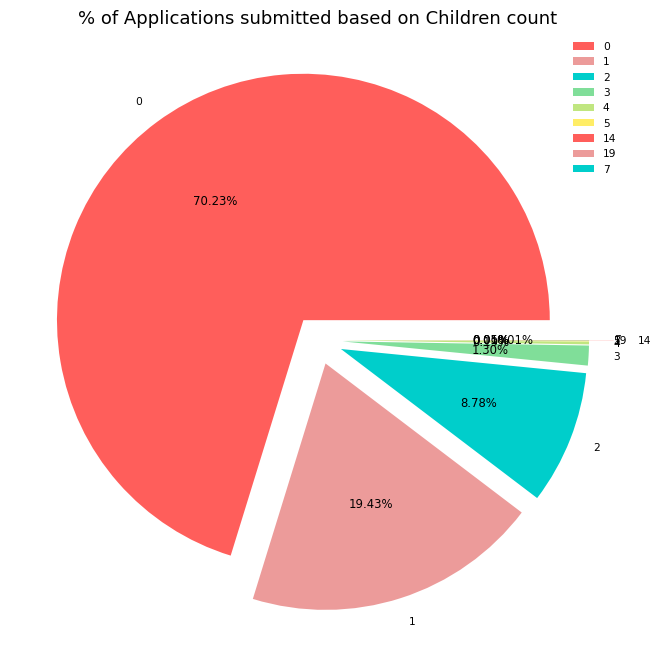

In [257]:
# This graph shows that, majority of applicant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(new_df['Num_children'].value_counts(), labels=new_df['Num_children'].value_counts().index,explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1],autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

In [258]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'IS_WORKING', 'Marital_status', 'Household_Size'],
      dtype='object')

In [259]:
new_df = new_df.loc[:,['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'IS_WORKING', 'Marital_status', 'Household_Size', 'Target']]

In [260]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Account_length,Age,Unemployed,Years_employed,IS_WORKING,Marital_status,Household_Size,Target
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,Other,2,15,33.0,0,12.0,1,1,2,1
1,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House / apartment,...,Security staff,2,29,59.0,0,3.0,1,1,2,0
2,5008808,0,0,1,0,270000.0,Working,Secondary,Single,House / apartment,...,Sales staff,1,4,52.0,0,8.0,1,0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,Other,1,20,62.0,1,0.0,1,0,1,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,Accountants,2,5,46.0,0,2.0,1,1,2,0


In [261]:
new_df.drop(['ID'],axis=1,inplace=True)

In [262]:
new_df.drop(['Email'],axis=1,inplace=True)

In [263]:
new_df.drop(['Phone'],axis=1,inplace=True)

In [264]:
new_df.drop(['Work_phone'],axis=1,inplace=True)

In [265]:
new_df

,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Num_family,Account_length,Age,Unemployed,Years_employed,IS_WORKING,Marital_status,Household_Size,Target
0,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,Other,2,15,33.0,0,12.0,1,1,2,1
1,1,1,1,0,112500.0,Working,Secondary,Married,House / apartment,Security staff,2,29,59.0,0,3.0,1,1,2,0
2,0,0,1,0,270000.0,Working,Secondary,Single,House / apartment,Sales staff,1,4,52.0,0,8.0,1,0,1,0
3,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,Other,1,20,62.0,1,0.0,1,0,1,0
4,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,Accountants,2,5,46.0,0,2.0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,180000.0,Pensioner,Secondary,Married,House / apartment,Laborers,2,20,56.0,0,1.0,1,1,2,1
9705,0,0,1,0,112500.0,Working,Secondary,Married,House / apartment,Other,2,19,43.0,0,7.0,1,1,2,1
9706,1,1,1,0,90000.0,Working,Secondary,Married,House / apartment,Other,2,21,52.0,0,5.0,1,1,2,1
9707,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,Medicine staff,2,32,34.0,0,4.0,1,1,2,1


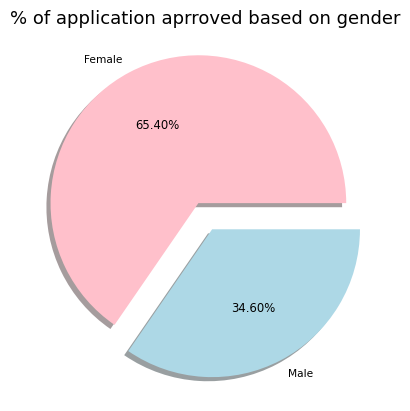

In [266]:
plt.pie(new_df[new_df['Target']==0]['Gender'].value_counts(),
               explode=[0.1,0.1],shadow=True,labels=['Female','Male'],
               autopct='%1.2f%%',colors=['pink','lightblue'])
plt.title('% of application aprroved based on gender')
plt.show()

Text(0.5, 1.0, 'Target Distribution')

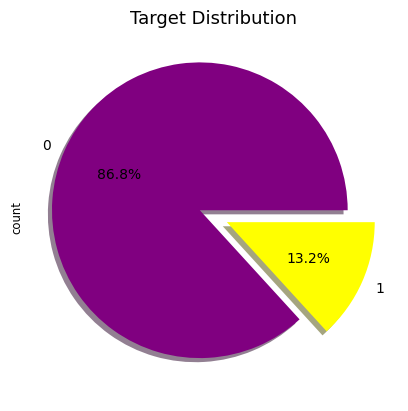

In [267]:
new_df['Target'].value_counts().plot.pie(explode=[0.1,0.1],
                                         autopct='%1.1f%%',shadow=True,colors=['purple','yellow'],
                                         textprops={'fontsize':10}).set_title('Target Distribution')

Converting all non-numerical columns to numerical

In [268]:
colname = []

for i in new_df.columns:
    if new_df[i].dtype=='object':
        colname.append(i)

colname

['Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Occupation_type']

In [269]:
#To check if there are any special characters in place of values
for i in new_df.columns:
    print({i:new_df[i].unique()})

{'Gender': array([1, 0], dtype=int64)}
{'Own_car': array([1, 0], dtype=int64)}
{'Own_property': array([1, 0], dtype=int64)}
{'Num_children': array([ 0,  1,  3,  2,  4,  5, 14, 19,  7], dtype=int64)}
{'Total_income': array([ 427500. ,  112500. ,  270000. ,  283500. ,  135000. ,  130500. ,
        157500. ,  405000. ,  211500. ,  360000. ,  126000. ,  315000. ,
        247500. ,  297000. ,  225000. ,  166500. ,  216000. ,  255150. ,
        148500. ,  202500. ,   94500. ,  450000. ,  180000. ,   90000. ,
        765000. ,  382500. ,  144000. ,  229500. ,  292500. ,   74250. ,
         40500. ,  337500. ,  193500. ,  267750. ,  139500. ,   67500. ,
        252000. ,  900000. ,  115290. ,  279000. ,   76500. ,  234000. ,
         81000. ,  108000. ,   99000. ,  198000. ,   45000. ,  238500. ,
        117000. ,  153000. , 1350000. ,  445500. ,  495000. ,   85500. ,
        306000. ,  562500. ,  189000. ,  328500. ,  310500. ,  540000. ,
        171000. ,  675000. ,  121500. ,   72000. ,   6

In [270]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname:
    new_df[x]=le.fit_transform(new_df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Income_type
mapping {'Pensioner': 0, 'Student': 1, 'Working': 2}
Feature Education_type
mapping {'Academic degree': 0, 'Higher education': 1, 'Secondary': 2}
Feature Family_status
mapping {'Married': 0, 'Single': 1}
Feature Housing_type
mapping {'House / apartment': 0, 'With parents': 1}
Feature Occupation_type
mapping {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Other': 12, 'Private service staff': 13, 'Realty agents': 14, 'Sales staff': 15, 'Secretaries': 16, 'Security staff': 17, 'Waiters/barmen staff': 18}


In [271]:
new_df

,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Num_family,Account_length,Age,Unemployed,Years_employed,IS_WORKING,Marital_status,Household_Size,Target
0,1,1,1,0,427500.0,2,1,0,0,12,2,15,33.0,0,12.0,1,1,2,1
1,1,1,1,0,112500.0,2,2,0,0,17,2,29,59.0,0,3.0,1,1,2,0
2,0,0,1,0,270000.0,2,2,1,0,15,1,4,52.0,0,8.0,1,0,1,0
3,0,0,1,0,283500.0,0,1,1,0,12,1,20,62.0,1,0.0,1,0,1,0
4,1,1,1,0,270000.0,2,1,0,0,0,2,5,46.0,0,2.0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,180000.0,0,2,0,0,8,2,20,56.0,0,1.0,1,1,2,1
9705,0,0,1,0,112500.0,2,2,0,0,12,2,19,43.0,0,7.0,1,1,2,1
9706,1,1,1,0,90000.0,2,2,0,0,12,2,21,52.0,0,5.0,1,1,2,1
9707,0,0,1,0,157500.0,0,1,0,0,11,2,32,34.0,0,4.0,1,1,2,1


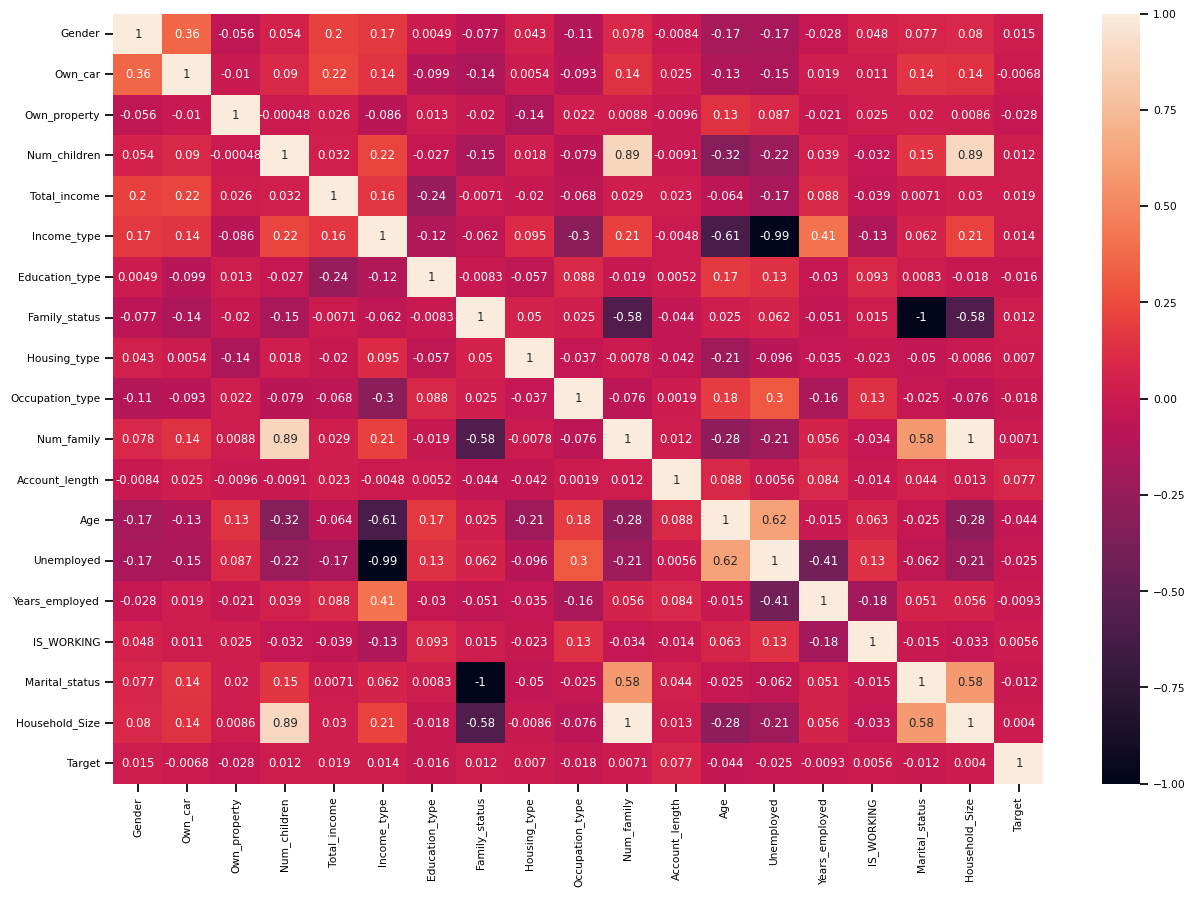

In [272]:
plt.figure(figsize=(15,10))
corr = new_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

unemployed is highly negatively  corelated to income type
martial status is highly negative corelated to family status
household size is highly postive corelated to num family
household size is highly postive corelated to num children


In [273]:
new_df.drop('Num_family',axis=1,inplace=True)

In [274]:
new_df.drop('Num_children',axis=1,inplace=True)

In [275]:
new_df.drop('IS_WORKING',axis=1,inplace=True)

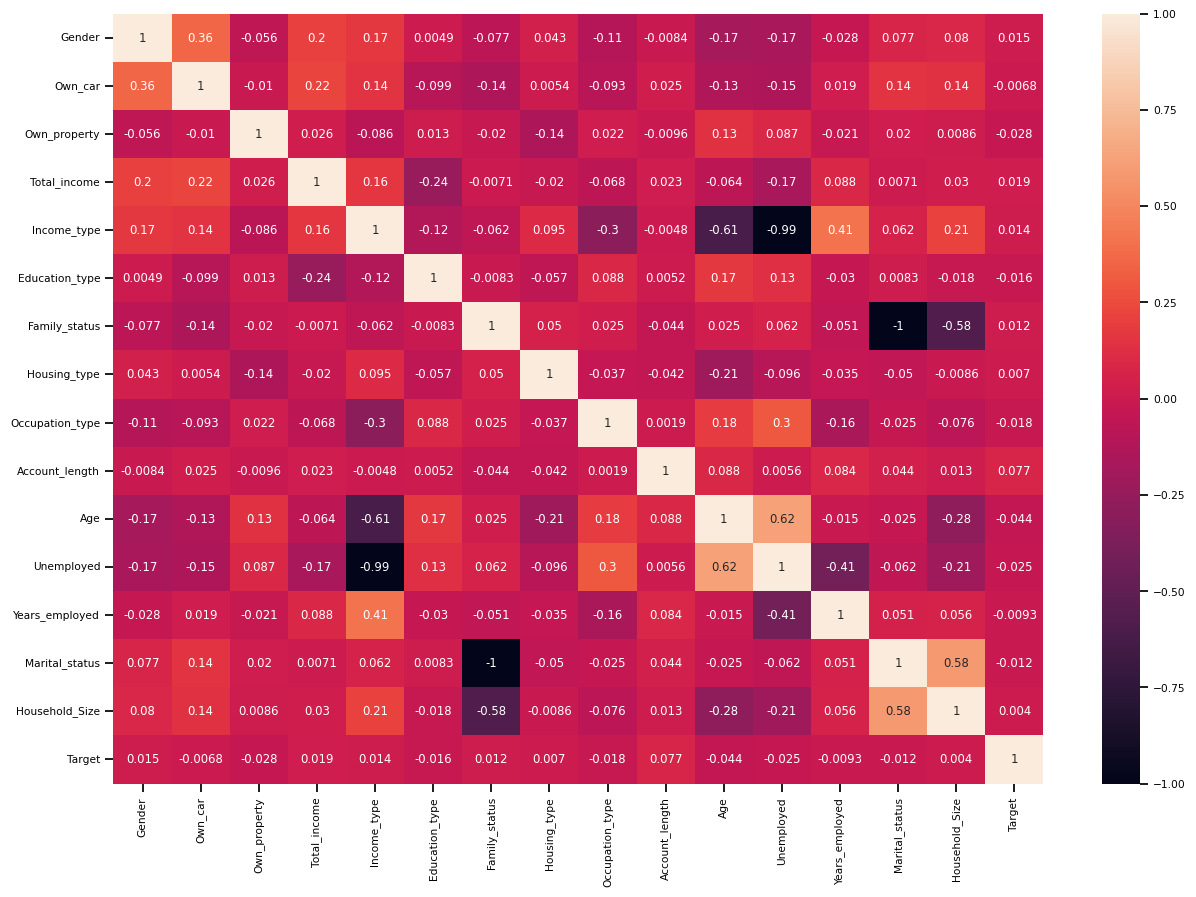

In [276]:
plt.figure(figsize=(15,10))
corr = new_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [277]:
new_df.drop(['Family_status'],axis=1,inplace=True)

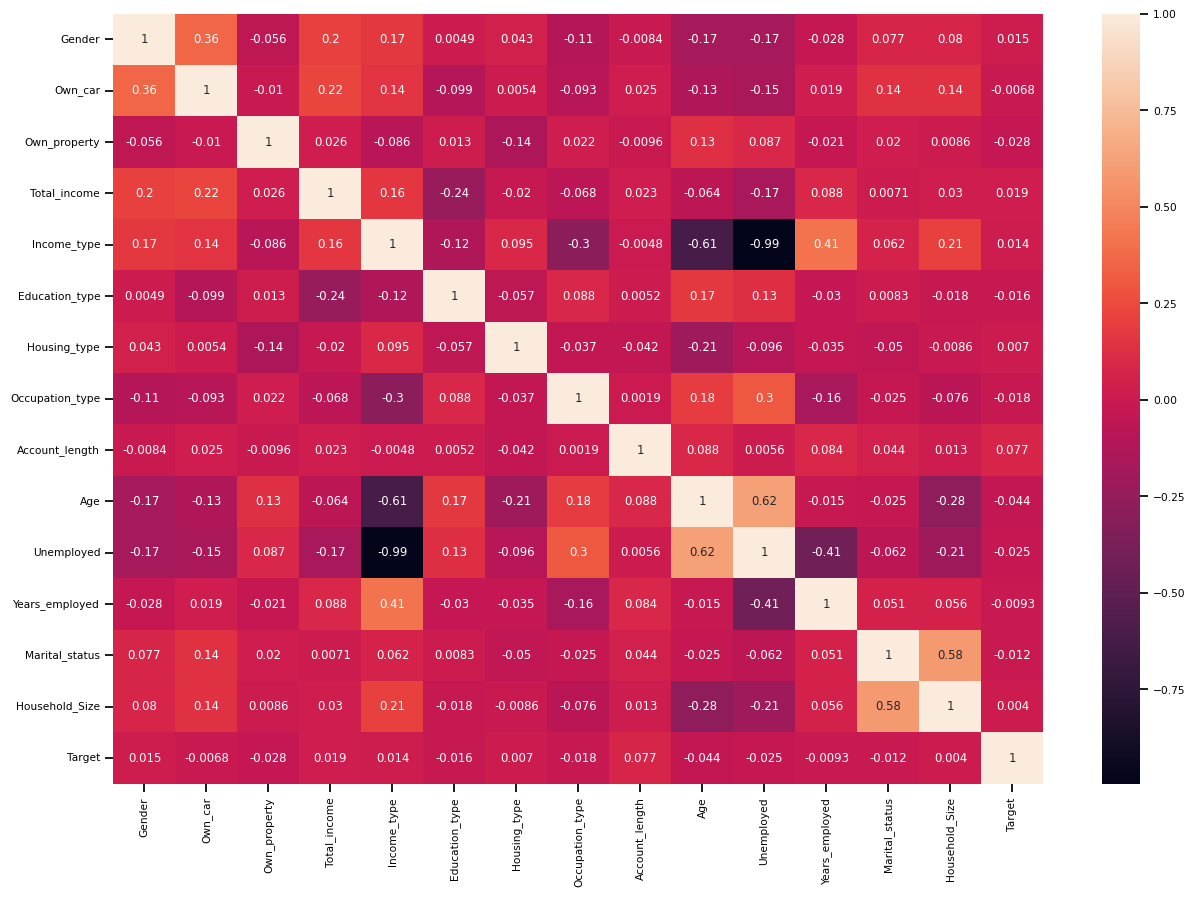

In [278]:
plt.figure(figsize=(15,10))
corr = new_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [279]:
new_df.shape

(9709, 15)

In [280]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Total_income     9709 non-null   float64
 4   Income_type      9709 non-null   int32  
 5   Education_type   9709 non-null   int32  
 6   Housing_type     9709 non-null   int32  
 7   Occupation_type  9709 non-null   int32  
 8   Account_length   9709 non-null   int64  
 9   Age              9709 non-null   float64
 10  Unemployed       9709 non-null   int64  
 11  Years_employed   9709 non-null   float64
 12  Marital_status   9709 non-null   int64  
 13  Household_Size   9709 non-null   int64  
 14  Target           9709 non-null   int32  
dtypes: float64(3), int32(5), int64(7)
memory usage: 948.3 KB


Creating X & Y variable for prediction

In [281]:
#Create X & Y
X = new_df.iloc[:,0:-1]
Y = new_df.iloc[:,-1]

In [282]:
print(X.shape)
print(Y.shape)

(9709, 14)
(9709,)


Scaling The X variable for prediction

In [283]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X)
X = ss.transform(X)

In [284]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)


In [285]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7767, 14)
(1942, 14)
(7767,)
(1942,)


Logistic Regression

In [286]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
print(Y_pred)


[0 0 0 ... 0 0 0]


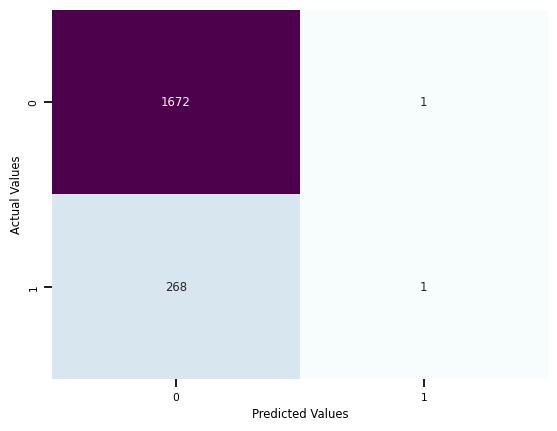

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.50      0.00      0.01       269

    accuracy                           0.86      1942
   macro avg       0.68      0.50      0.47      1942
weighted avg       0.81      0.86      0.80      1942

Accuracy of the model:  0.8614830072090628


In [287]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

KNN

In [288]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

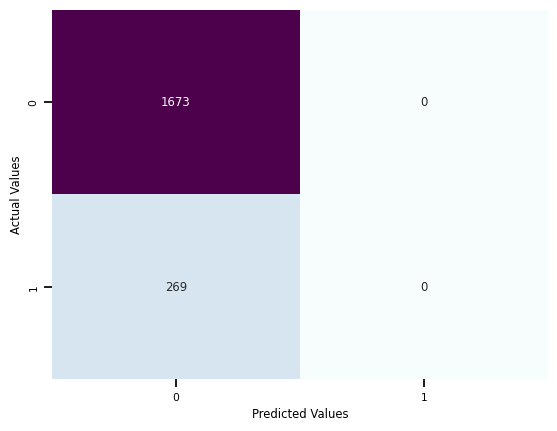

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the model:  0.8614830072090628


In [289]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

SVC

In [290]:
#fitting SVC to the training set
from sklearn.svm import SVC

classiffier = SVC(kernel= 'rbf',gamma=0.1,C=1)
classiffier.fit(X_train,Y_train)
#predicting the test set results
Y_pred = classiffier.predict(X_test)

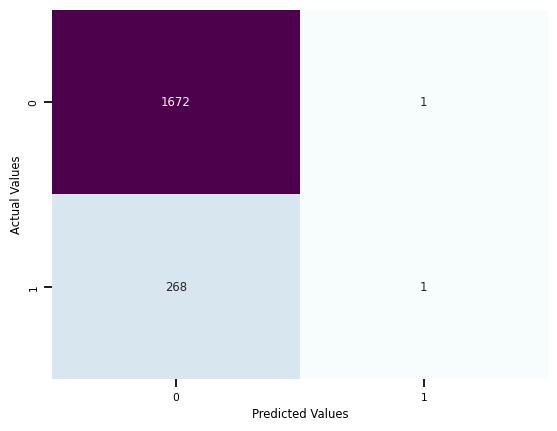

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.50      0.00      0.01       269

    accuracy                           0.86      1942
   macro avg       0.68      0.50      0.47      1942
weighted avg       0.81      0.86      0.80      1942

Accuracy of the model:  0.8614830072090628


In [291]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

Decision Tree

In [292]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="entropy",max_depth=None,random_state=10)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [293]:
print(list(zip(Y_test,Y_pred)))

[(1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0),

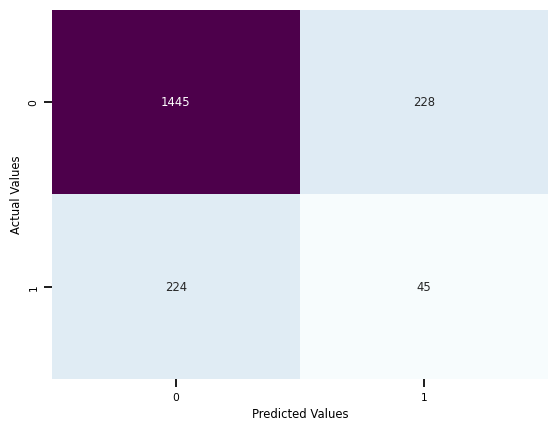

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1673
           1       0.16      0.17      0.17       269

    accuracy                           0.77      1942
   macro avg       0.52      0.52      0.52      1942
weighted avg       0.77      0.77      0.77      1942

Accuracy of the model:  0.7672502574665293


In [294]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [295]:
y=new_df["Target"]
x=new_df.drop(["Target"],axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


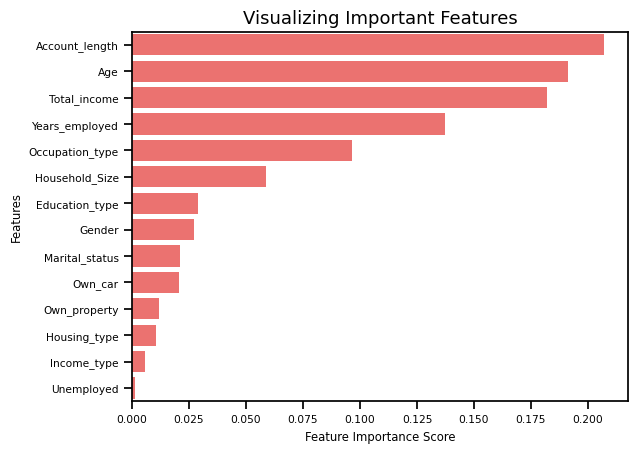

In [296]:
feature_imp = pd.Series(model_DecisionTree.feature_importances_,index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Random Forest

In [297]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=65,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

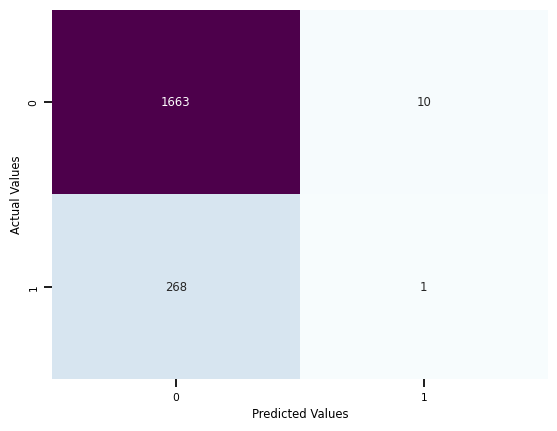

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1673
           1       0.09      0.00      0.01       269

    accuracy                           0.86      1942
   macro avg       0.48      0.50      0.47      1942
weighted avg       0.75      0.86      0.80      1942

Accuracy of the model:  0.8568486096807415


In [298]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [299]:
y=new_df["Target"]
x=new_df.drop(["Target"],axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


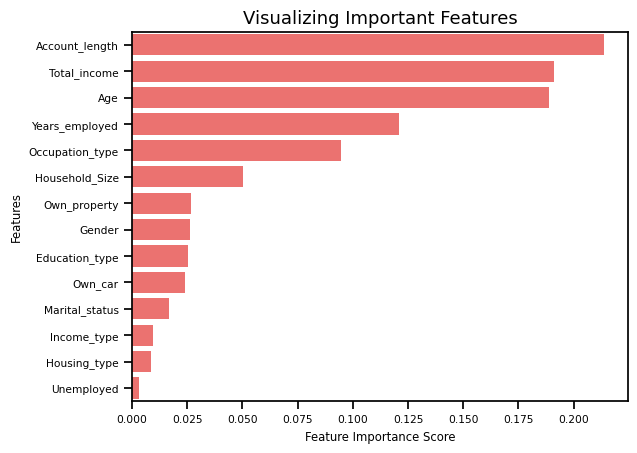

In [300]:
feature_imp = pd.Series(model_RandomForest.feature_importances_,index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

As we see from above and decision tree feature importance the variable such as unemplyed, housing_type, Income_type are not that important feature in terms of model, but also we have to go with domain knowledge to eliminate the variable.

If we drop this least significant feature we have to drop from new_df then we have to create again X, Y variable and build the model again.

In [301]:
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=500,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train,Y_train)

Y_pred = model_ExtraTrees.predict(X_test)

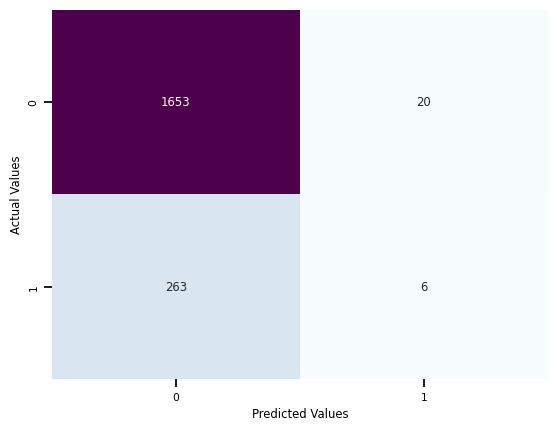

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1673
           1       0.23      0.02      0.04       269

    accuracy                           0.85      1942
   macro avg       0.55      0.51      0.48      1942
weighted avg       0.78      0.85      0.80      1942

Accuracy of the model:  0.8542739443872297


In [302]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


In [303]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)

Y_pred=model_AdaBoost.predict(X_test)

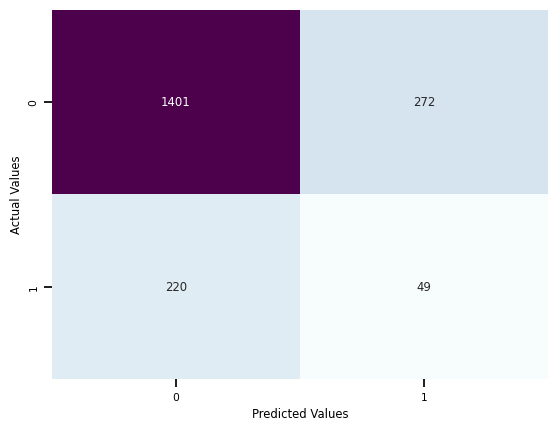

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1673
           1       0.15      0.18      0.17       269

    accuracy                           0.75      1942
   macro avg       0.51      0.51      0.51      1942
weighted avg       0.77      0.75      0.76      1942

Accuracy of the model:  0.7466529351184346


In [304]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


In class 1 49 is pridicted correctly till now the best

In [305]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train,Y_train)

Y_pred=model_XGBoost.predict(X_test)

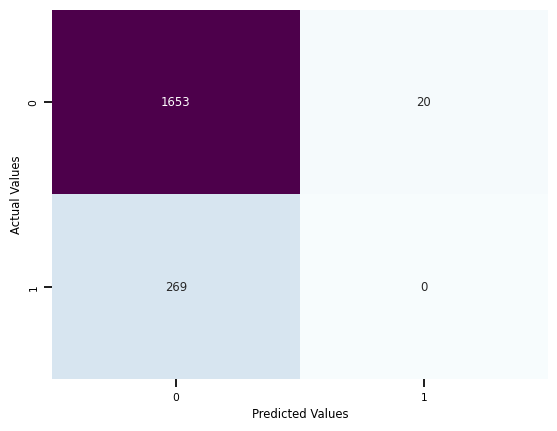

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.85      1942
   macro avg       0.43      0.49      0.46      1942
weighted avg       0.74      0.85      0.79      1942

Accuracy of the model:  0.8511843460350155


In [306]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

Smote

In [307]:
import imblearn

In [308]:
import sklearn.utils._param_validation

In [309]:
X=new_df.values[:,:-1]
Y=new_df.values[:,-1]

In [310]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [311]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [312]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))

# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))

print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  881
Before OverSampling, counts of label '0':  5915
After OverSampling, the shape of train_X:  (11830, 14)
After OverSampling, the shape of train_y:  (11830,)
After OverSampling, counts of label '1':  5915
After OverSampling, counts of label '0':  5915


In [313]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=200,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train_res,Y_train_res)

Y_pred=model_RandomForest.predict(X_test)

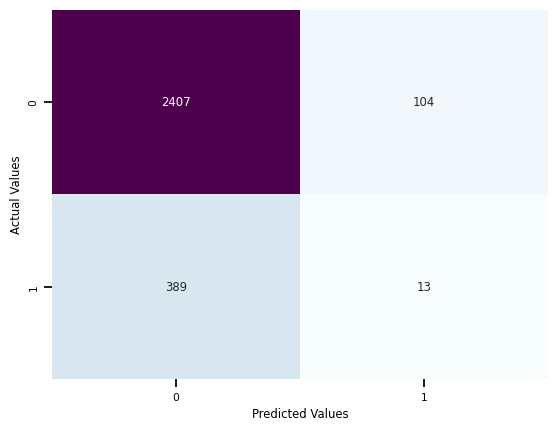

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      2511
         1.0       0.11      0.03      0.05       402

    accuracy                           0.83      2913
   macro avg       0.49      0.50      0.48      2913
weighted avg       0.76      0.83      0.79      2913

Accuracy of the model:  0.8307586680398215


In [314]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


In [315]:
#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=151,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train_res,Y_train_res)

Y_pred = model_ExtraTrees.predict(X_test)

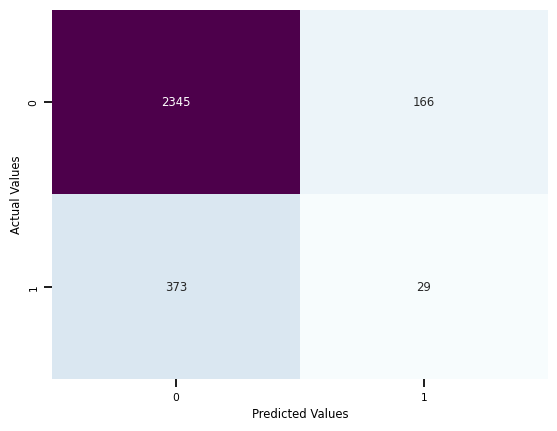

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      2511
         1.0       0.15      0.07      0.10       402

    accuracy                           0.81      2913
   macro avg       0.51      0.50      0.50      2913
weighted avg       0.76      0.81      0.79      2913

Accuracy of the model:  0.8149673875729488


In [316]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [317]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=200,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train_res,Y_train_res)

Y_pred=model_AdaBoost.predict(X_test)

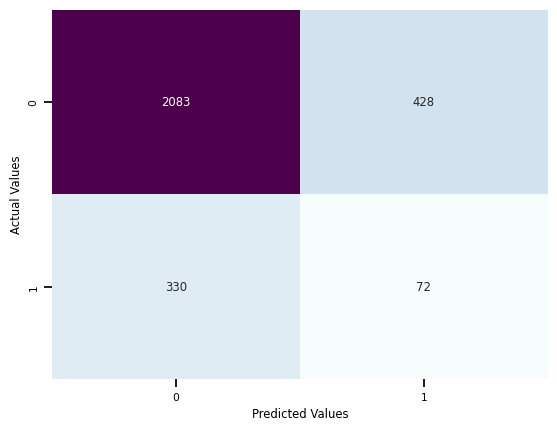

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85      2511
         1.0       0.14      0.18      0.16       402

    accuracy                           0.74      2913
   macro avg       0.50      0.50      0.50      2913
weighted avg       0.76      0.74      0.75      2913

Accuracy of the model:  0.739787161002403


In [318]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [319]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=1000,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train_res,Y_train_res)

Y_pred=model_XGBoost.predict(X_test)

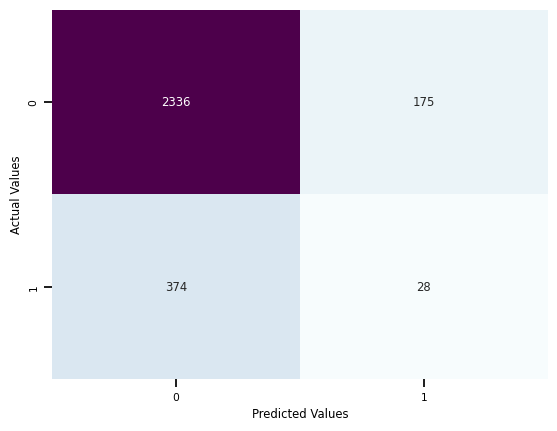

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      2511
         1.0       0.14      0.07      0.09       402

    accuracy                           0.81      2913
   macro avg       0.50      0.50      0.49      2913
weighted avg       0.76      0.81      0.78      2913

Accuracy of the model:  0.811534500514933


In [320]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [321]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train_res,Y_train_res)

Y_pred=classifier.predict(X_test)

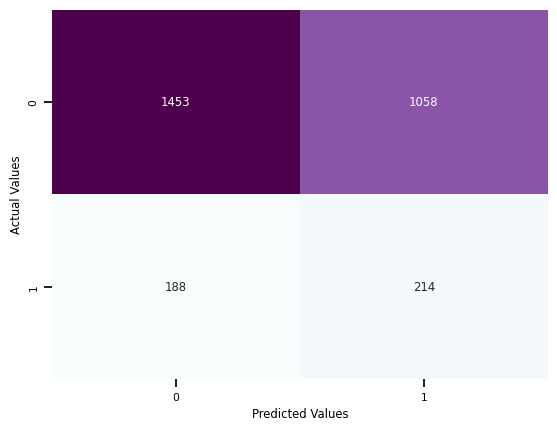

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70      2511
         1.0       0.17      0.53      0.26       402

    accuracy                           0.57      2913
   macro avg       0.53      0.56      0.48      2913
weighted avg       0.79      0.57      0.64      2913

Accuracy of the model:  0.5722622725712324


In [322]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [323]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train_res,Y_train_res)
#predicting the test set results
Y_pred = classifier.predict(X_test)

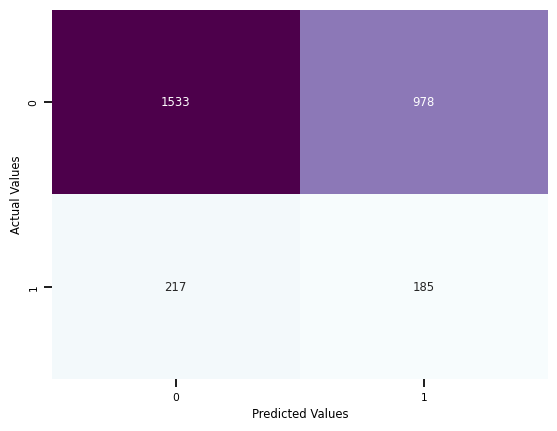

Classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.61      0.72      2511
         1.0       0.16      0.46      0.24       402

    accuracy                           0.59      2913
   macro avg       0.52      0.54      0.48      2913
weighted avg       0.78      0.59      0.65      2913

Accuracy of the model:  0.5897699965671129


In [324]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [325]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=4,
                              metric='manhattan')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train_res,Y_train_res)

Y_pred=model_KNN.predict(X_test)

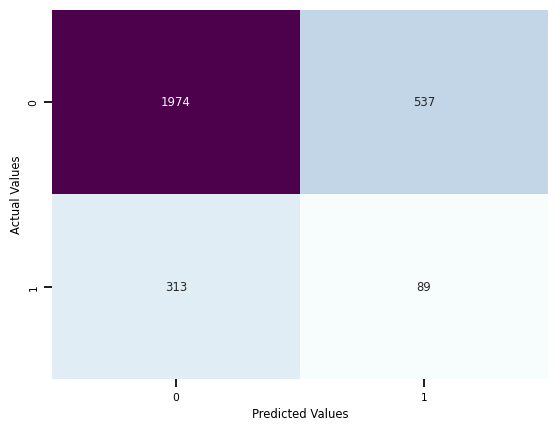

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82      2511
         1.0       0.14      0.22      0.17       402

    accuracy                           0.71      2913
   macro avg       0.50      0.50      0.50      2913
weighted avg       0.76      0.71      0.73      2913

Accuracy of the model:  0.7082046000686577


In [326]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [327]:
before = {
    'Logistic': '86%',
    'KNN': '86%',
    'SVC': '86%',
    'Decision_Tree': '76%',
    'Random_Forest': '85%',
    'Extra_Tree': '85%',
    'Ada_Boost': '74%',
    'XGBoosting': '85%'
}

In [328]:
after = {
    'Logistic': '57%',
    'KNN': '70%',
    'SVC': '58%',
    'Decision_Tree': '76%',
    'Random_Forest': '83%',
    'Extra_Tree': '81%',
    'Ada_Boost': '73%',
    'XGBoosting': '81%'
}

In [329]:
df1 = pd.Series(before)
df1.head(9)

Logistic         86%
KNN              86%
SVC              86%
Decision_Tree    76%
Random_Forest    85%
Extra_Tree       85%
Ada_Boost        74%
XGBoosting       85%
dtype: object

In [330]:
df2 = pd.Series(after)
df2.head(9)

Logistic         57%
KNN              70%
SVC              58%
Decision_Tree    76%
Random_Forest    83%
Extra_Tree       81%
Ada_Boost        73%
XGBoosting       81%
dtype: object

According to the above predictions, we can observe multiple models are giving multiple different predictions Out of all those models, we can observe that KNN is performing well in terms of predicting my class 1, which is my class of importance where I want the model to be predict precisely in terms of rest of the class.